<h1>SJU - DSS 740 - Machine Learning (Spring 2025)</h1>
<h2 style = 'color:yellow'>Data Preprocessing and Feature Engineering</h2>
<h3 style = 'color:green'>Import Libraries</h3>

In [11]:
!pip install missingno

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer

<h3 style = 'color:green'>Load and Explore Data</h3>

In [2]:
df = pd.read_csv("../../Data/boston_housing (Regression).csv")
df.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


In [8]:
df = pd.read_csv("../../Data/synthetic_housing_data (Classification).csv")
df.head()

,income,credit_score,house_size,location,property_type,listing_date,realtor_rating,flood_risk,crime_rate,buy
0,79934.283060,426.0,2148,suburb,Multi-Family,18.4.2023,2.674429,Low,36.504238,not buy
1,67234.713977,313.0,2144,suburb,Townhouse,2019-03-14,2.833726,High,45.847862,buy
2,82953.770762,311.0,1845,downtown,Townhouse,7/26/2019,3.900024,High,50.340274,not buy
3,100460.597128,386.0,1102,rural,Multi-Family,12/28/2020,3.297150,Medium,51.113726,buy
4,65316.932506,823.0,1274,rural,Multi-Family,10.1.2019,3.668849,High,48.209067,buy


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   income          990 non-null    float64
 1   credit_score    995 non-null    float64
 2   house_size      1000 non-null   int64  
 3   location        1000 non-null   object 
 4   property_type   1000 non-null   object 
 5   listing_date    1000 non-null   object 
 6   realtor_rating  995 non-null    float64
 7   flood_risk      999 non-null    object 
 8   crime_rate      1000 non-null   float64
 9   buy             1000 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 78.3+ KB


<Axes: >

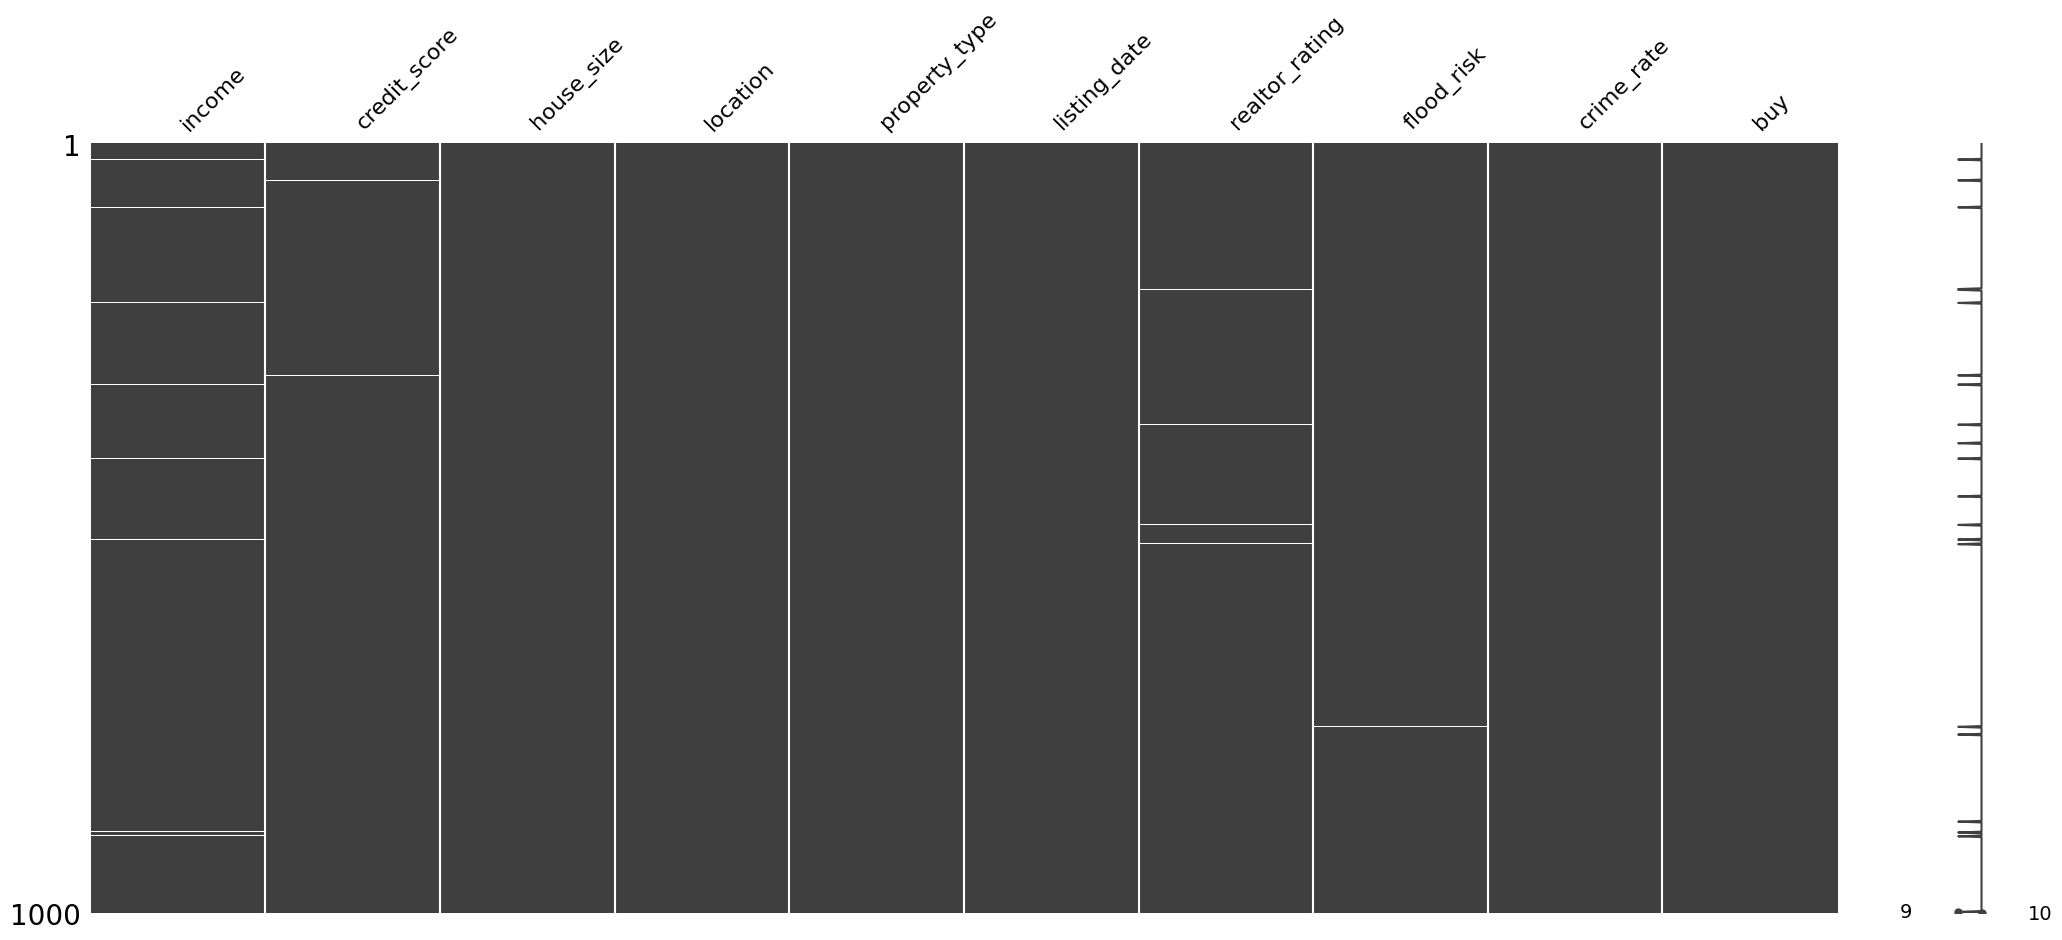

In [ ]:
# Explore MissingNo
mno.matrix(df)

In [ ]:
si = SimpleImputer(strategy='mean')
# Numerical columns
numericalColumns = df.select_dtypes(include=['float64', 'int64'])

In [19]:
numericalColumns[:5]

,income,credit_score,house_size,realtor_rating,crime_rate
0,79934.283060,426.0,2148,2.674429,36.504238
1,67234.713977,313.0,2144,2.833726,45.847862
2,82953.770762,311.0,1845,3.900024,50.340274
3,100460.597128,386.0,1102,3.297150,51.113726
4,65316.932506,823.0,1274,3.668849,48.209067


In [20]:
# Apply SimpleImputer to numerical columns
df[numericalColumns.columns] = si.fit_transform(numericalColumns)
# Check for missing values again
df.isnull().sum()

income            0
credit_score      0
house_size        0
location          0
property_type     0
listing_date      0
realtor_rating    0
flood_risk        1
crime_rate        0
buy               0
dtype: int64

In [21]:
# For categorical columns, we can use the most frequent value (mode)

c:\Users\Owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='income', ylabel='Count'>

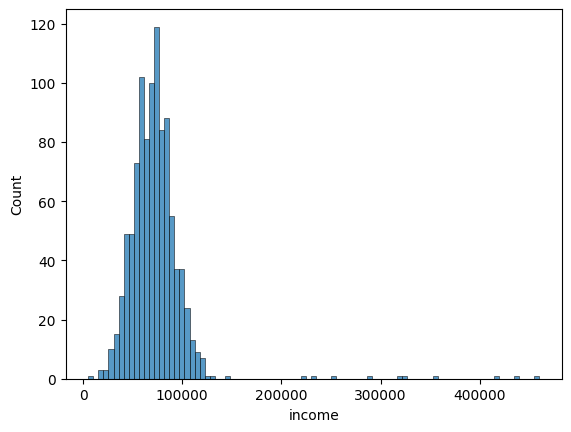

In [22]:
sns.histplot(df['income'])

<Axes: >

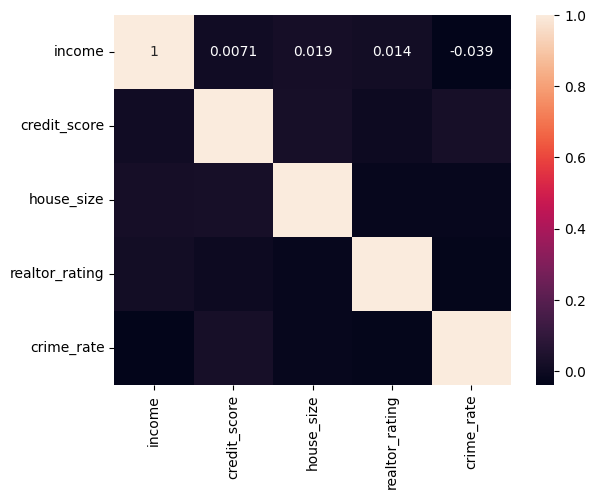

In [ ]:
sns.heatmap(df[numericalColumns.columns].corr(), annot=True)

c:\Users\Owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

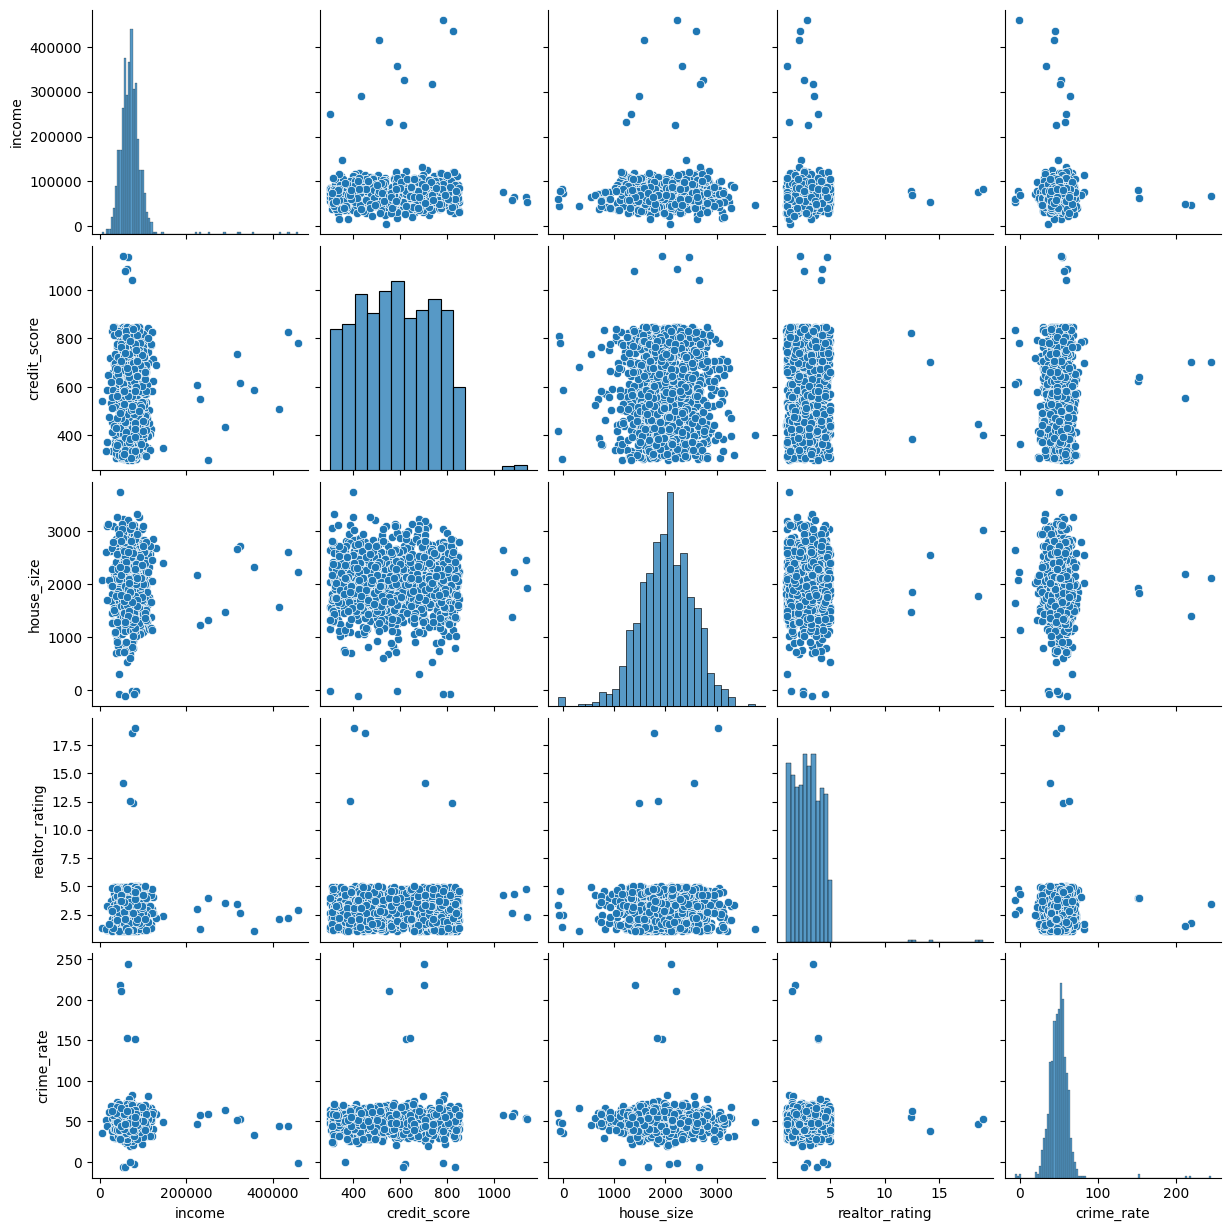

In [27]:
sns.pairplot(df[numericalColumns.columns])

In [28]:
# Pandas Get Dummies for categorical columns
categoricalColumns = df.select_dtypes(include=['object'])
categoricalColumns[:5]

,location,property_type,listing_date,flood_risk,buy
0,suburb,Multi-Family,18.4.2023,Low,not buy
1,suburb,Townhouse,2019-03-14,High,buy
2,downtown,Townhouse,7/26/2019,High,not buy
3,rural,Multi-Family,12/28/2020,Medium,buy
4,rural,Multi-Family,10.1.2019,High,buy


In [31]:
df['location'].unique()

array(['suburb', 'downtown', 'rural', 'industrial_area', 'uptown',
       'industrial_arpa', 'suburs', 'downtowv', 'downtowj', 'downtorn',
       'sujurb', 'suburx', 'sueurb', 'suborb', 'ruras'], dtype=object)

In [29]:
df.drop('listing_date', axis = 1, inplace=True)

In [30]:
df.columns

Index(['income', 'credit_score', 'house_size', 'location', 'property_type',
       'realtor_rating', 'flood_risk', 'crime_rate', 'buy'],
      dtype='object')

In [ ]:
categoricalColumns = df.select_dtypes(include=['object'])
df_categorical = pd.get_dummies(categoricalColumns, drop_first=True, prefix='loc_', ) # Ensure that data type = 0 and 1 instead of True and False

df_categorical.head()

,loc__downtowj,loc__downtown,loc__downtowv,loc__industrial_area,loc__industrial_arpa,loc__rural,loc__ruras,loc__suborb,loc__suburb,loc__suburs,...,loc__Container,loc__Multi-Family,loc__Single Family,loc__Townhouse,loc__Unknown,loc__High,loc__Low,loc__Medium,loc__UnknownRisk,loc__not buy
0,False,False,False,False,False,False,False,False,True,False,...,False,True,False,False,False,False,True,False,False,True
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,True,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,True
3,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
4,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False


In [ ]:
# Create training and testing sets
X = pd.concat([df[numericalColumns.columns], df_categorical], axis=1)
# X.drop('buy', axis = 1, inplace=True)
X.head()

KeyError: "['buy'] not found in axis"

In [35]:
y = df['buy']

In [36]:
# X = predictor variables (everything else)
# y = target variable (buy or not buy)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
Xtrain.shape

(800, 30)

In [38]:
ytrain.shape

(800,)

In [41]:
Xtrain[:5]

,income,credit_score,house_size,realtor_rating,crime_rate,loc__downtowj,loc__downtown,loc__downtowv,loc__industrial_area,loc__industrial_arpa,...,loc__Container,loc__Multi-Family,loc__Single Family,loc__Townhouse,loc__Unknown,loc__High,loc__Low,loc__Medium,loc__UnknownRisk,loc__not buy
29,64166.125004,681.0,2209.0,3.270909,53.700611,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
535,70947.973426,516.0,1889.0,2.034366,53.116529,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
695,63809.071214,804.0,2478.0,2.418914,57.034279,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
557,61348.836244,587.0,2001.0,2.173414,57.938185,False,False,False,True,False,...,False,True,False,False,False,False,True,False,False,True
836,101010.009856,461.0,1450.0,1.507778,30.632473,False,False,False,True,False,...,False,True,False,False,False,False,True,False,False,True


In [42]:
# MinMaxScaler for feature scaling
scaler = MinMaxScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtrain_scaled[:5]

array([[0.12972105, 0.45357143, 0.59989594, 0.12593013, 0.24044577,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ],
       [0.1446342 , 0.25714286, 0.51664932, 0.05735564, 0.23812446,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.1289359 , 0.6       , 0.66987513, 0.07868137, 0.2536947 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.

In [43]:
ss = StandardScaler()
Xtrain_scaled_ss = ss.fit_transform(Xtrain)
Xtrain_scaled_ss[:5]

array([[-0.26909792,  0.6348904 ,  0.36959146,  0.20563142,  0.25007464,
         0.        , -0.49021432,  0.        , -0.50780078, -0.03537746,
        -0.49413355, -0.03537746, -0.03537746, -0.49413355, -0.03537746,
        -0.03537746, -0.03537746, -0.03537746,  2.        , -0.54267705,
        -0.03537746, -0.58697344,  1.78563201, -0.61009236, -0.05006262,
        -0.73985727, -0.69982706,  1.47465358, -0.03537746, -0.77047096],
       [-0.07306747, -0.39565534, -0.23720544, -0.64641423,  0.21214354,
         0.        , -0.49021432,  0.        ,  1.96927621, -0.03537746,
        -0.49413355, -0.03537746, -0.03537746, -0.49413355, -0.03537746,
        -0.03537746, -0.03537746, -0.03537746, -0.5       ,  1.84271658,
        -0.03537746, -0.58697344, -0.5600258 , -0.61009236, -0.05006262,
         1.35161205, -0.69982706, -0.67812537, -0.03537746, -0.77047096],
       [-0.27941862,  1.40311541,  0.87968011, -0.38143974,  0.46656749,
         0.        , -0.49021432,  0.        , -0